In [1]:
import matplotlib.pyplot as plt
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.word import WordExtractor
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [2]:
def wordcloud(name):
    data = pd.read_csv('C:/Users/vxpko/202105_lab/Stock/news.csv',encoding='utf-8')
    noun_extractor = LRNounExtractor_v2(verbose=True)
    nouns = noun_extractor.train_extract(data[data['name']==name]['content'])
    
    count=[]
    for word, score in sorted(nouns.items()):
        info=[]
        word=word.replace('"','').replace('“','').replace('‘','').replace("'",'')
        if len(word)>1:
            info.append(word)
            info.append(score[0])

            count.append(info)
    
    
    icon = Image.open('./dollar.png')
    mask = Image.new("RGB", icon.size, (255,255,255))
    mask.paste(icon,icon)
    mask = np.array(mask)

    
    
    
    
    wordcloud = WordCloud(font_path='./NanumGothic.ttf',width=1500,height=1000,background_color='black',mask=mask,max_font_size=300)
    wordcloud.generate_from_frequencies(dict(count))
    plt.imshow(wordcloud)
    return wordcloud.to_file('word.png')

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 6798 from 54 sents. mem=0.129 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=13413, mem=0.144 Gb
[Noun Extractor] batch prediction was completed for 2489 words
[Noun Extractor] checked compounds. discovered 104 compounds
[Noun Extractor] postprocessing detaching_features : 1066 -> 1066
[Noun Extractor] postprocessing ignore_features : 1066 -> 1047
[Noun Extractor] postprocessing ignore_NJ : 1047 -> 1047
[Noun Extractor] 1047 nouns (104 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.149 Gb                    
[Noun Extractor] 59.32 % eojeols are covered


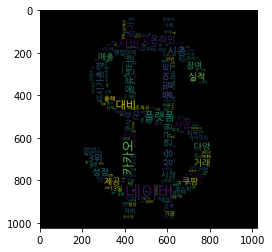

In [3]:
wordcloud('NAVER')